# Projeto de Previsão de Score de Crédito


O objetivo deste projeto é aplicar técnicas de pré-processamento para preparar uma base de dados bancária com foco na futura previsão do **score de crédito**, que é um sistema de pontuação que reflete o histórico de crédito e a probabilidade de um indivíduo pagar suas dívidas. Trata-se de uma métrica essencial para auxiliar instituições financeiras na tomada de decisão sobre a concessão de crédito.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importação dos dados
df = pd.read_csv("/content/credit_score.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


## Dicionário de Variáveis

- **Age**: Idade do cliente, em anos.

- **Income**: Salário anual do cliente.

- **Gender**: Gênero do cliente.

- **Education**: Nível de escolaridade do cliente.

- **Marital**: Estado civil do cliente.

- **Number of Children**: Número de filhos do cliente.

- **Home**: Tipo de residência, própria ou alugada.

- **Credit Score**: Score de crédito do cliente.


## Pré-Processamento dos Dados

Nessa etapa será realizada a verificação dos tipos de dados e o tratamento dos valores ausentes. Além disso, as variáveis categóricas serão padronizadas. Esses ajustes são necessários para garantir que análises mais precisas sejam feitas, incluindo uma futura aplicação de modelos preditivos.


In [ ]:
# Verifica tipo e dados não nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


As variáveis **Age, Income e Number of Children** estão com tipos incorretos. Porém, Age possui dados nulos e Income está com o formato incorreto. Por isso, precisaremos fazer um tratamento nessas variáveis antes da conversão.

In [ ]:
# Converte Number of Children para inteiro
df['Number of Children'] = df['Number of Children'].astype(int)

In [ ]:
# Remove separador de milhar e decimais de Income
df['Income'] = df['Income'].str.replace('.', '', regex=False).str.replace(',00', '', regex=False)

# Converte Income para inteiro
df['Income'] = df['Income'].astype(int)

df.sample(5)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
67,26.0,Female,47500,Associate's Degree,Single,0,Rented,Average
126,30.0,Male,117500,Master's Degree,Married,2,Owned,High
49,38.0,Female,67500,Bachelor's Degree,Married,2,Owned,High
64,40.0,Male,142500,High School Diploma,Single,0,Owned,High
83,NaN,Female,85000,Doctorate,Married,1,Owned,High


Vamos verificar qual a proporção de dados nulos em **Age**.

In [ ]:
# Porcentagem de nulos em Age
(df['Age'].isnull().sum() / len(df)) * 100

np.float64(20.73170731707317)

In [ ]:
# Estatística descritiva de Age
df['Age'].describe()

,Age
count,130.000000
mean,37.507692
std,8.500110
min,25.000000
25%,30.000000
50%,36.000000
75%,45.000000
max,53.000000


In [ ]:
# Checando dados nulos
df[df['Age'].isnull()]

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
8,NaN,Female,80000,Master's Degree,Married,2,Owned,High
9,NaN,Male,105000,Doctorate,Single,0,Owned,High
10,NaN,Female,90000,High School Diploma,Married,1,Owned,High
11,NaN,Male,135000,Bachelor's Degree,Married,0,Owned,High
12,NaN,Female,35000,High School Diploma,Single,0,Rented,Low
13,NaN,Male,55000,Associate's Degree,Single,0,Rented,Average
14,NaN,Female,70000,Bachelor's Degree,Married,2,Owned,High
15,NaN,Male,95000,Master's Degree,Single,0,Owned,High
16,NaN,Female,85000,Doctorate,Married,1,Owned,High
17,NaN,Male,125000,High School Diploma,Married,0,Owned,High


A variável **Age possui 20% de dados nulos**. Como nossa base de dados tem poucas entradas, remover essa quantidade de dados não é a opção ideal. Além disso, a idade pode impactar a pontuação de crédito e por isso optamos por manter a variável.

Os dados estão bem distribuídos, com uma média de 37.5 e mediana de 36.0, e as demais variáveis apresentam distribuição consistente nessas linhas. Assim, vamos fazer a substituição dos valores nulos pela mediana e transformar o tipo para inteiro.

In [ ]:
# Substituindo os valores nulos em Age pela mediana
mediana_Age = df['Age'].median()
df['Age'] = df['Age'].fillna(mediana_Age)

# Transformação do tipo de dados para Inteiro
df['Age'] = df['Age'].astype(int)

df.sample(5)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
120,44,Male,87500,Master's Degree,Single,0,Owned,High
72,51,Male,145000,Bachelor's Degree,Married,0,Owned,High
115,48,Female,87500,Doctorate,Married,1,Owned,High
28,49,Female,65000,Doctorate,Married,1,Owned,High
118,34,Male,47500,Associate's Degree,Single,0,Rented,Average


In [ ]:
# Conferência de tipos e dados nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


Agora vamos conferir as variáveis categóricas.

In [ ]:
# Seleciona colunas textuais
df_colunas_texo = df.select_dtypes(include='object')

# Converte strings para letras minúsculas e verifica dados únicos
for coluna in df_colunas_texo:
    df[coluna] = df[coluna].str.lower()
    print(coluna, df[coluna].unique())

Gender ['female' 'male']
Education ["bachelor's degree" "master's degree" 'doctorate' 'high school diploma'
 "associate's degree"]
Marital Status ['single' 'married']
Home Ownership ['rented' 'owned']
Credit Score ['high' 'average' 'low']


In [ ]:
# Nomes de coluna em letras minúsculas e substitui espaços por _
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

df.sample(5)

,age,gender,income,education,marital_status,number_of_children,home_ownership,credit_score
118,34,male,47500,associate's degree,single,0,rented,average
85,36,female,27500,high school diploma,single,0,rented,low
40,51,male,140000,bachelor's degree,married,0,owned,high
148,36,male,57500,associate's degree,single,0,rented,average
27,44,male,75000,master's degree,single,0,owned,high


Não possuímos categorias com inconsistências, então vamos seguir para a próxima etapa.

## Análise Exploratória de Dados

Nesta etapa será realizada uma análise exploratória univariada e bivariada para entender a distribuição das variáveis e identificar possíveis padrões ou comportamentos relevantes na base. A visualização dos dados ajuda a levantar hipóteses iniciais e a observar relações importantes entre as variáveis.

### Análise Univariada

In [ ]:
# Estatística descritiva
df.describe()

,age,income,number_of_children
count,164.000000,164.000000,164.000000
mean,37.195122,83765.243902,0.652439
std,7.586619,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,31.750000,57500.000000,0.000000
50%,36.000000,83750.000000,0.000000
75%,43.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


As variáveis Age e Income possuem média muito próxima da mediana e parecem estar bem distribuídas.

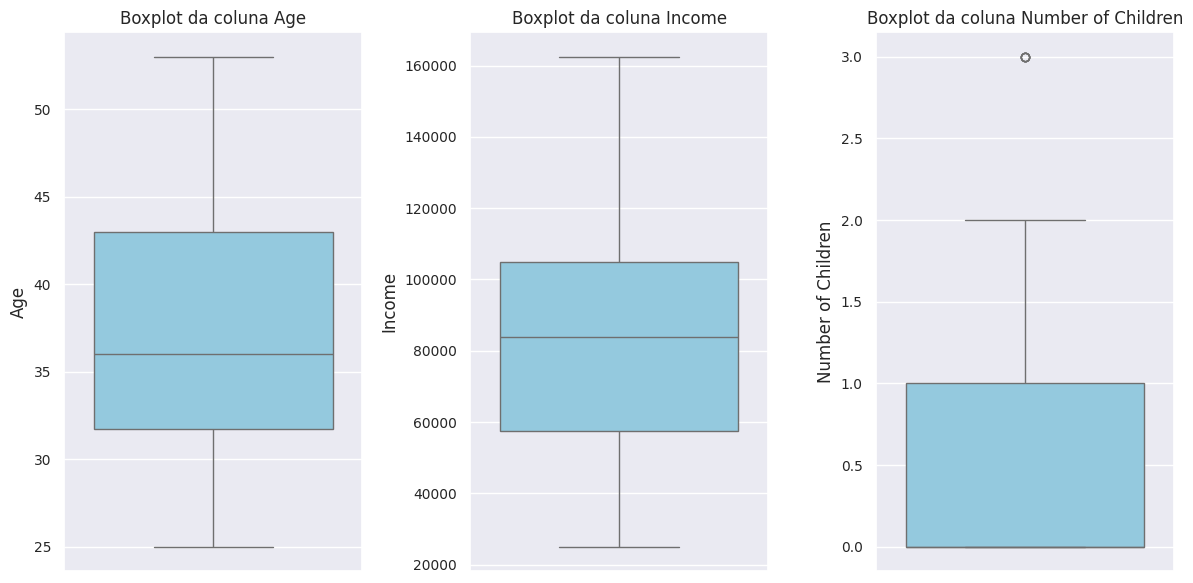

In [ ]:
# Boxplot das variáveis numéricas
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")

# Age
plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='age', color='skyblue')
plt.title('Boxplot da coluna Age')
plt.yticks(fontsize=10)
plt.ylabel('Age')

# Income
plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='income', color='skyblue')
plt.title('Boxplot da coluna Income')
plt.yticks(fontsize=10)
plt.ylabel('Income')

# Number of Children
plt.subplot(1, 3, 3)
sns.boxplot(data=df, y='number_of_children', color='skyblue')
plt.title('Boxplot da coluna Number of Children')
plt.yticks(fontsize=10)
plt.ylabel('Number of Children')

plt.tight_layout()
plt.show()

In [ ]:
# Porcentagens em Number of Children
df['number_of_children'].value_counts(normalize=True) * 100

,proportion
number_of_children,
0,59.146341
1,19.512195
2,18.292683
3,3.048780


Observamos a presença de outliers na variável Number of Children. Porém, esta só possui 4 categorias (0, 1, 2 e 3). Sendo assim, não vamos remover os outliers.

Um ponto a ser observado é de que as categorias não estão balanceadas, pois temos muitas entradas com 0 filhos (59%), e poucos com 3 filhos (3%).

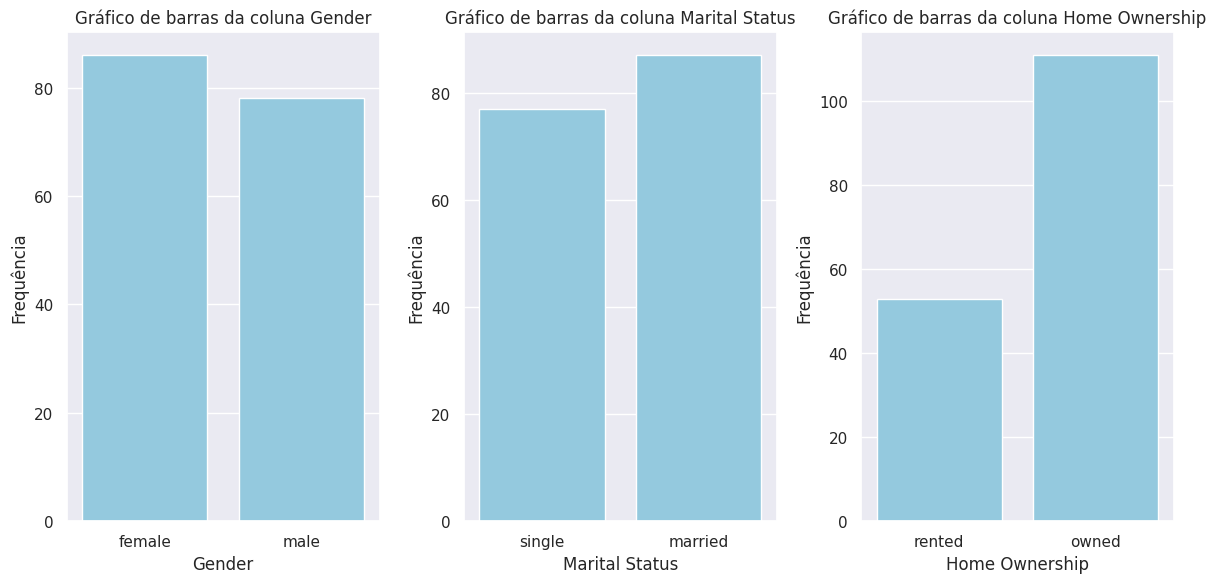

In [ ]:
# Gráfico de barras para variáveis categóricas
plt.figure(figsize=(12, 6))

# Gender
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='gender', color='skyblue')
plt.title('Gráfico de barras da coluna Gender')
plt.xlabel('Gender')
plt.ylabel('Frequência')

# Marital Status
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='marital_status', color='skyblue')
plt.title('Gráfico de barras da coluna Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequência')

# Home Ownership
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='home_ownership', color='skyblue')
plt.title('Gráfico de barras da coluna Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

In [ ]:
# Porcentagem de Home Ownership
df['home_ownership'].value_counts(normalize=True) * 100

,proportion
home_ownership,
owned,67.682927
rented,32.317073


Observamos que os dados estão balanceados em Gender e Marital Status. Porém, nossa base de dados possui mais pessoas com casa própria (67%) em comparação com pessoas que residem em casa alugada (32%).

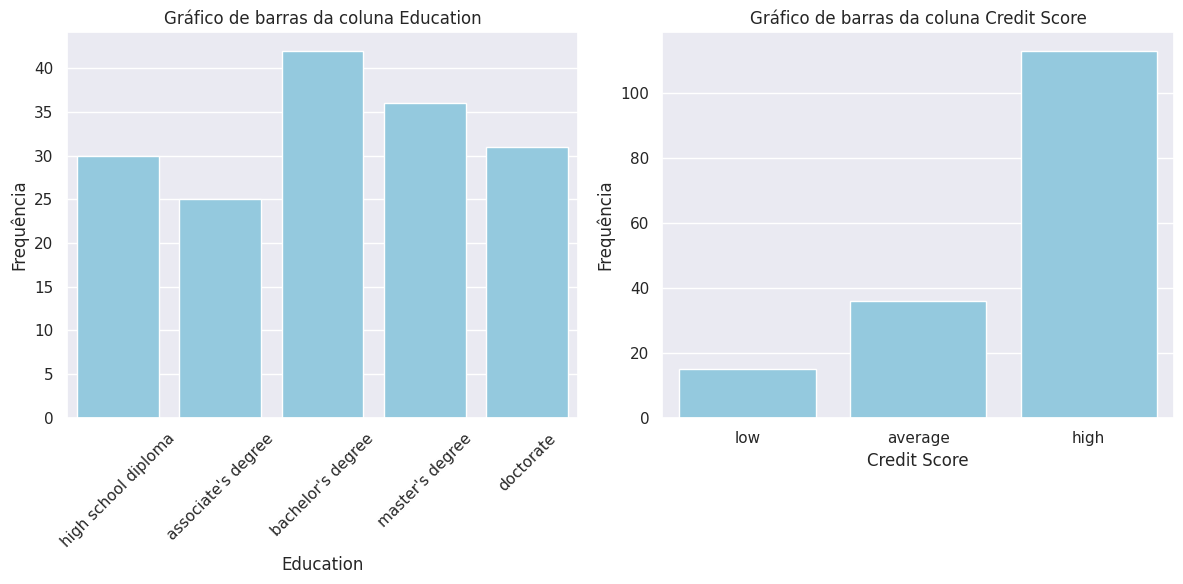

In [ ]:
# Gráfico de barras para variáveis categóricas
plt.figure(figsize=(12, 6))

# Education
education_order = ['high school diploma', "associate's degree",
             "bachelor's degree", "master's degree", 'doctorate']
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='education', color='skyblue', order=education_order)
plt.title('Gráfico de barras da coluna Education')
plt.xlabel('Education')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

# Credit Score
credit_score_order = ['low', 'average', 'high']
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='credit_score', color='skyblue', order=credit_score_order)
plt.title('Gráfico de barras da coluna Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

In [ ]:
# Porcentagem de Credit Score
df['credit_score'].value_counts(normalize=True) * 100

,proportion
credit_score,
high,68.902439
average,21.951220
low,9.146341


As frequências em Education apresentam uma pequena variação, sendo que a maioria dos clientes possui diploma de graduação.

Já para a variável Credit Score, encontramos dados desbalanceados. Temos muitos dados com elevada pontuação de crédito (68%) e poucos com baixa pontuação de crédito (9%).

### Análise Bivariada



Agora vamos observar a relação entre as variáveis:

*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?

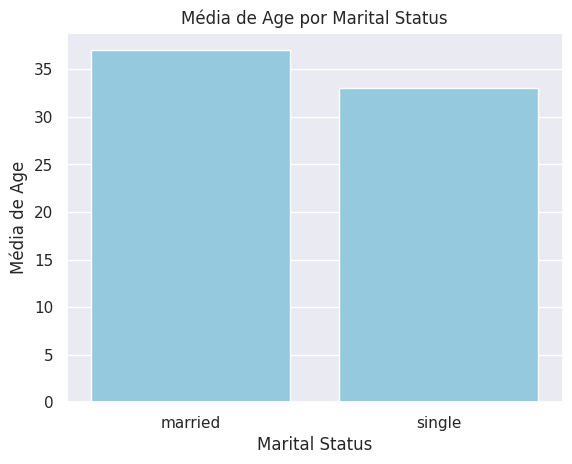

In [ ]:
# Calcula a mediana de Age por Marital Satatus
mediana = df.groupby('marital_status')['age'].median().reset_index()

# Plota mediana de Age por Marital Status
sns.barplot(data=mediana, x='marital_status', y='age', color='skyblue')
plt.title('Média de Age por Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Média de Age')
plt.show()

Clientes casados apresentam uma média de idade pouco superior à de clientes solteiros.

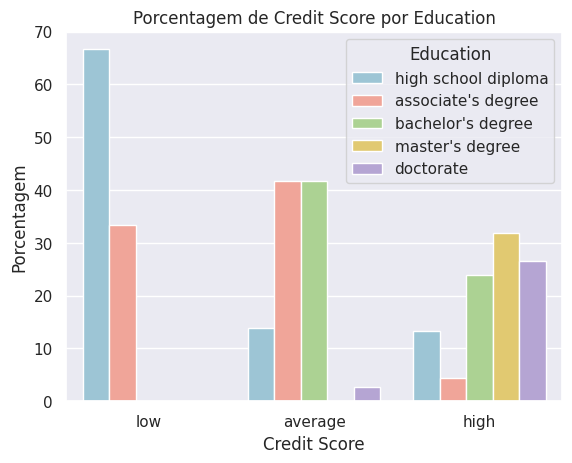

In [ ]:
# Agrupa por Credit Score e Education e faz a contagem e porcentagem por categoria
df_grupo = df.groupby(['credit_score', 'education']).size().reset_index(name='Contagem')
df_grupo['Total'] = df_grupo.groupby('credit_score')['Contagem'].transform('sum')
df_grupo['Porcentagem'] = (df_grupo['Contagem'] / df_grupo['Total']) * 100

palette = '#93c9df', '#ff9a8a', '#aadc88', '#f4d35e', '#b39ddb'

# Plota porcentagem de Credit Score por Education
ax = sns.barplot(data=df_grupo, x='credit_score', y='Porcentagem', hue='education',
            order=credit_score_order, hue_order=education_order, palette=palette)
plt.title('Porcentagem de Credit Score por Education')
plt.xlabel('Credit Score')
ax.legend().set_title('Education')
plt.show()

Clientes com baixa pontuação de crédito geralmente possuem diploma de ensino médio ou técnico, enquanto aqueles com pontuação alta tendem a ter graduação, mestrado ou doutorado. Esse padrão é esperado, pois pessoas com maior escolaridade frequentemente ocupam empregos mais estáveis e bem remunerados.

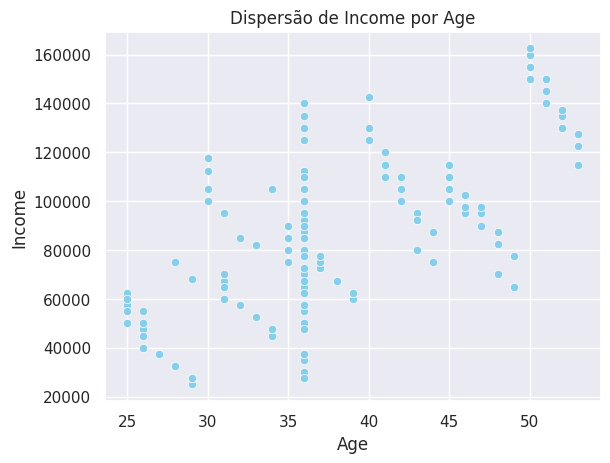

In [ ]:
# Dispersão de Income por Age
sns.scatterplot(data=df, x='age', y='income', color='skyblue')
plt.title('Dispersão de Income por Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

Pessoas mais jovens tendem a apresentar os menores salários, enquanto as de maior idade possuem os maiores salários.

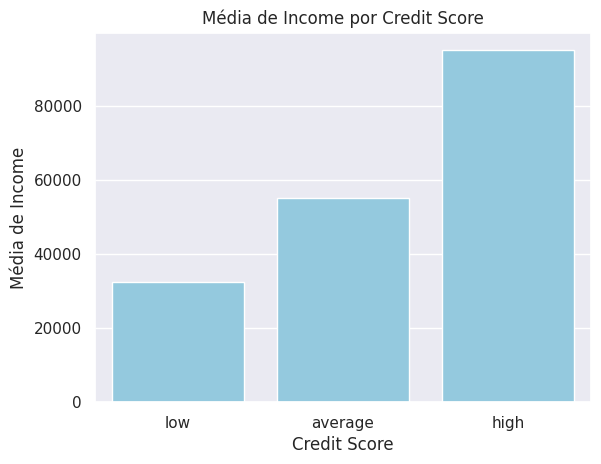

In [ ]:
# Calcula a mediana de Income por Credit Score
mediana = df.groupby('credit_score')['income'].median().reset_index()

# Plota mediana de Income por Credit Score
sns.barplot(data=mediana, x='credit_score', y='income', order=credit_score_order, color='skyblue')
plt.title('Média de Income por Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Média de Income')
plt.show()

É esperado que pessoas com salários mais altos apresentem uma pontuação de crédito maior, já que possuem maior poder de compra. Esse comportamento é observado na nossa base de dados.

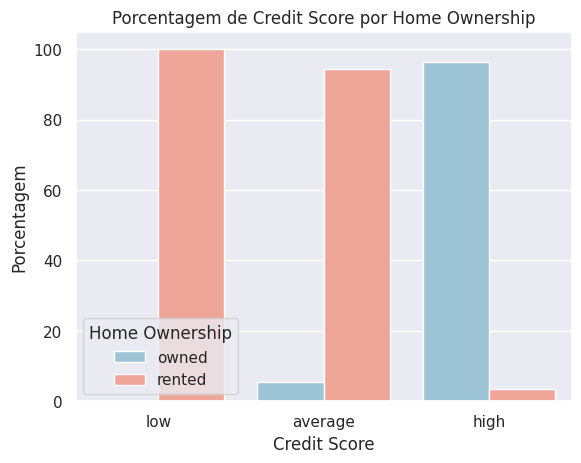

In [ ]:
# Agrupa por Credit Score e Home Ownership e faz a contagem e porcentagem por categoria
df_grupo = df.groupby(['credit_score', 'home_ownership']).size().reset_index(name='Contagem')
df_grupo['Total'] = df_grupo.groupby('credit_score')['Contagem'].transform('sum')
df_grupo['Porcentagem'] = (df_grupo['Contagem'] / df_grupo['Total']) * 100

# Plota porcentagem de Credit Score por Home Ownership
ax = sns.barplot(data=df_grupo, x='credit_score', y='Porcentagem',
                 hue='home_ownership', order=credit_score_order, palette=palette)
plt.title('Porcentagem de Credit Score por Home Ownership')
plt.xlabel('Credit Score')
ax.legend().set_title('Home Ownership')
sns.move_legend(ax, "lower left")
plt.show()

Pessoas que possuem casa própria tendem a apresentar uma pontuação de crédito alta, enquanto aquelas que residem em casas alugadas possuem pontuações de crédito baixas ou médias.

Considerando a base de dados e as análises realizadas até este ponto, outras questões foram levantadas:
- A média salarial de clientes com maior escolaridade é superior?
- Pessoas mais velhas tendem a apresentar pontuação de crédito mais alta?
- Existe diferença na pontuação de crédito entre mulheres e homens?

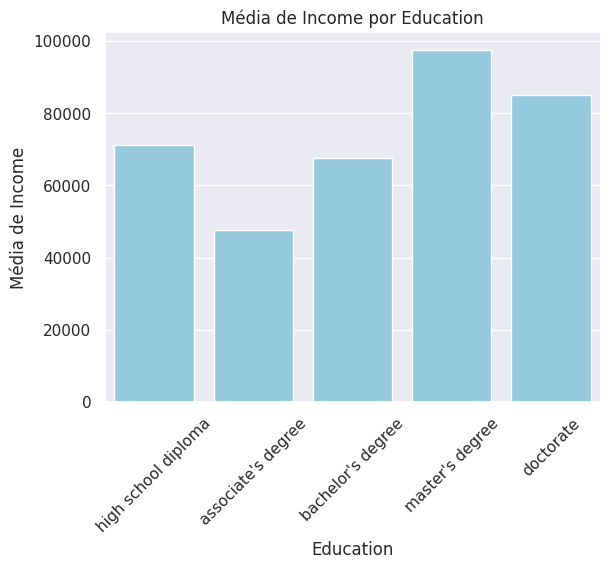

In [ ]:
# Calcula a mediana de Income por Education
mediana = df.groupby('education')['income'].median().reset_index()

# Plota mediana de Income por Education
sns.barplot(data=mediana, x='education', y='income', order=education_order, color='skyblue')
plt.title('Média de Income por Education')
plt.xlabel('Education')
plt.ylabel('Média de Income')
plt.xticks(rotation=45)
plt.show()

Podemos observar que os maiores salários estão concentrados entre pessoas com mestrado ou doutorado. Esse padrão é esperado, já que níveis mais altos de escolaridade frequentemente estão associados a posições de trabalho mais qualificadas e melhor remuneradas.

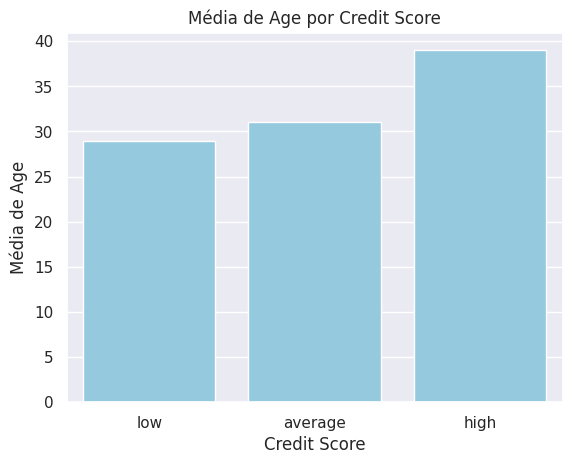

In [ ]:
# Calcula a mediana de Age por Credit Score
mediana = df.groupby('credit_score')['age'].median().reset_index()

# Plota mediana de Age por Credit Score
sns.barplot(data=mediana, x='credit_score', y='age', order=credit_score_order, color='skyblue')
plt.title('Média de Age por Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Média de Age')
plt.show()

Clientes com maior idade tendem a possuir uma maior pontuação de crédito. Considerando que nossa base de dados possui pessoas de 25 a 53 anos, esse comportamento é esperado.

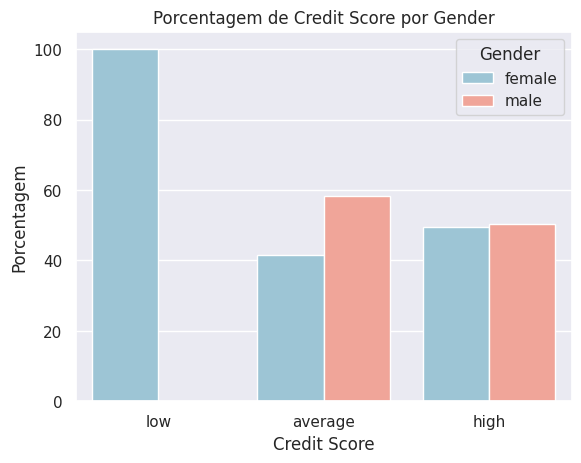

In [ ]:
# Agrupa por Credit Score e Gender e faz a contagem e porcentagem por categoria
df_grupo = df.groupby(['credit_score', 'gender']).size().reset_index(name='Contagem')
df_grupo['Total'] = df_grupo.groupby('credit_score')['Contagem'].transform('sum')
df_grupo['Porcentagem'] = (df_grupo['Contagem'] / df_grupo['Total']) * 100

# Plota porcentagem de Credit Score por Gender
ax = sns.barplot(data=df_grupo, x='credit_score', y='Porcentagem',
                 hue='gender', order=credit_score_order, palette=palette)
plt.title('Porcentagem de Credit Score por Gender')
plt.xlabel('Credit Score')
ax.legend().set_title('Gender')
plt.show()

No nosso conjunto de dados, baixas pontuações de crédito estão associadas somente a mulheres. Vamos entender melhor esse comportamento.

In [ ]:
df[df['credit_score'] == 'low']

,age,gender,income,education,marital_status,number_of_children,home_ownership,credit_score
12,36,female,35000,high school diploma,single,0,rented,low
18,36,female,30000,associate's degree,single,0,rented,low
24,29,female,25000,high school diploma,single,0,rented,low
41,27,female,37500,high school diploma,single,0,rented,low
47,28,female,32500,associate's degree,single,0,rented,low
53,29,female,27500,high school diploma,single,0,rented,low
73,27,female,37500,high school diploma,single,0,rented,low
79,28,female,32500,associate's degree,single,0,rented,low
85,36,female,27500,high school diploma,single,0,rented,low
105,27,female,37500,high school diploma,single,0,rented,low


Ao analisar os dados de clientes com baixa pontuação de crédito, observamos que todos são solteiros, não têm filhos, residem em casas alugadas, possuem ensino médio ou técnico completo e são mulheres.

### Principais conclusões

- A maioria dos clientes possui uma pontuação de crédito alta, graduação ou pós-graduação, casa própria, e não tem filhos.
- Clientes com maior escolaridade tendem a ter uma pontuação de crédito mais alta.
- Maiores salários estão associados a clientes com mestrado ou doutorado, e a uma pontuação de crédito mais alta.
- Clientes mais velhos possuem maiores salários e consequentemente maior pontuação de crédito.
- Clientes que possuem casa própria tendem a apresentar uma pontuação de crédito média a alta.
- Mulheres possuem uma pontuação de crédito menor em comparação aos homens.

## Correlação e Transformação dos Dados

Para o cálculo da correlação, as variáveis categóricas serão transformadas em variáveis numéricas. Após será aplicada a correlação linear de Pearson, com o objetivo de identificar possíveis relações relevantes para a modelagem.

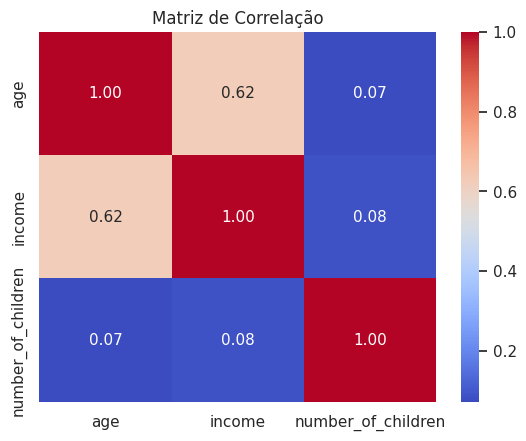

In [ ]:
# Seleciona variáveis numéricas e cria matriz de correlação
corr = df.select_dtypes(include=['number']).corr()

# Plota mapa de calor da matriz de correlação
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 11})
plt.title('Matriz de Correlação')
plt.show()

Temos apenas 3 variáveis numéricas. Dentre elas, a idade e o salário possuem uma correlação positiva. Ou seja, quanto maior a idade, maior o salário. Esse é um comportamento esperado, já que nossa base de dados possui clientes de 25 a 53 anos, e clientes mais velhos tendem a possuir um emprego mais estável.

Optamos por utilizar o Label Encoder para transformar variáveis com duas categorias.

A variável Credit Score apresenta uma ordem natural nas categorias (baixo, médio e alto). Além desta, a variável educação também possui uma hierarquia entre suas categorias. Portanto, neste primeiro momento, também vamos utilizar o Label Encoder para ambas.

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Função que transforma dados categóricos com LabelEncoder e define a ordem das categorias
def encode_column(column, order):
    label_encoder = LabelEncoder()
    # Converte tipo e determina a ordem das categorias
    label_encoder.classes_ = np.array(order)
    # Aplica LabelEncoder
    df[column + '_encoded'] = label_encoder.transform(df[column])

In [ ]:
# Define a ordem das categorias
orders = {
    'gender': ['male', 'female'],
    'education': ['high school diploma', "associate's degree",
                  "bachelor's degree", "master's degree", 'doctorate'],
    'marital_status': ['single', 'married'],
    'home_ownership': ['rented', 'owned'],
    'credit_score': ['low', 'average', 'high']
}

# Aplica função
[encode_column(column, order) for column, order in orders.items()]

df.sample(5)

,age,gender,income,education,marital_status,number_of_children,home_ownership,credit_score,gender_encoded,education_encoded,marital_status_encoded,home_ownership_encoded,credit_score_encoded
104,51,male,150000,bachelor's degree,married,0,owned,high,0,2,1,1,2
54,34,male,47500,associate's degree,single,0,rented,average,0,1,0,0,1
41,27,female,37500,high school diploma,single,0,rented,low,1,0,0,0,0
78,52,male,135000,high school diploma,married,0,owned,high,0,0,1,1,2
75,37,female,75000,bachelor's degree,married,2,owned,high,1,2,1,1,2


In [ ]:
# Remove colunas com atributos categóricos
df = df.drop(['gender', 'education', 'marital_status',
              'home_ownership', 'credit_score'], axis=1)

df.sample(5)

,age,income,number_of_children,gender_encoded,education_encoded,marital_status_encoded,home_ownership_encoded,credit_score_encoded
59,30,112500,2,0,3,1,1,2
7,31,60000,0,0,2,0,0,1
67,26,47500,0,1,1,0,0,1
145,36,95000,1,1,0,1,1,2
29,25,55000,0,1,2,0,0,1


In [ ]:
# Confere tipo dos dados
df.dtypes

,0
age,int64
income,int64
number_of_children,int64
gender_encoded,int64
education_encoded,int64
marital_status_encoded,int64
home_ownership_encoded,int64
credit_score_encoded,int64


Vamos plotar novamente a correlação, agora com as variáveis categóricas.

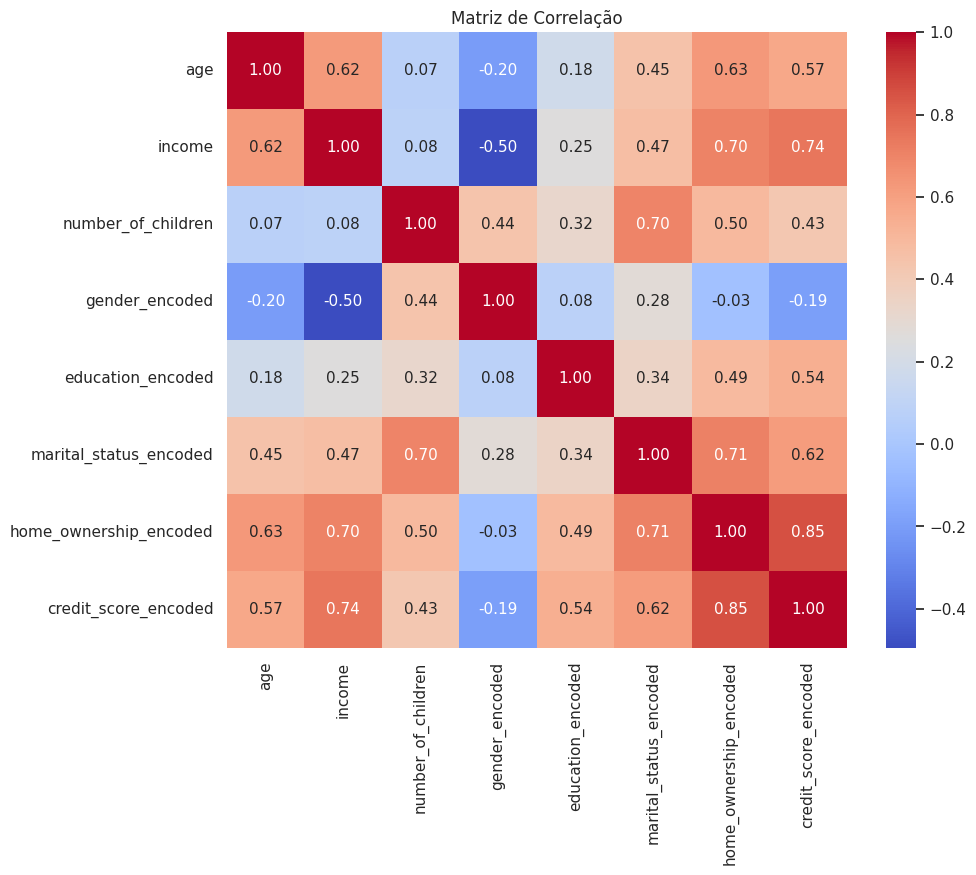

In [ ]:
plt.figure(figsize=(10, 8))

# Plota mapa de calor da matriz de correlação
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 11})
plt.title('Matriz de Correlação')
plt.show()

Agora é possível observar a relação entre todas as variáveis do nosso conjunto de dados, sendo que a maior correlação encontrada foi entre a pontuação de crédito e a posse de casa própria (0.85). Isso indica que clientes com casa própria tendem a ter uma pontuação de crédito superior. Além disso, esses clientes geralmente apresentam salários mais altos e tendem a estar casados.

Outras variáveis também mostraram correlação positiva com a pontuação de crédito, como salário e estado civil, enquanto o gênero apresentou a menor correlação com a pontuação de crédito.

O gênero apresentou uma média correlação negativa com o salário. Ou seja, as clientes mulheres (1) possuem menores salários em comparação aos homens (0).

## Separação da base em treino e teste

A base de dados será dividida em conjuntos de treino e teste, garantindo que o modelo possa ser avaliado de forma adequada. Além disso, será aplicado um balanceamento na variável credit_score, para corrigir desequilíbrios que pudessem comprometer a performance do modelo preditivo.

In [ ]:
# Separa os dados
x = df.drop(['credit_score_encoded'], axis=1)
y = df['credit_score_encoded']

In [ ]:
from sklearn.model_selection import train_test_split

# Separa os dados em conjuntos de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
# Confere o tamanho dos conjuntos de dados
print('Tamanho de x_train:', x_train.shape)
print('Tamanho de y_train:', y_train.shape)
print('Tamanho de x_test:', x_test.shape)
print('Tamanho de y_test:', y_test.shape)

Tamanho de x_train: (123, 7)
Tamanho de y_train: (123,)
Tamanho de x_test: (41, 7)
Tamanho de y_test: (41,)


### Balanceamento

Na etapa de Análise Exploratória observamos que a variável Credit Score está desbalanceada. Vamos analisar melhor essa característica.

In [ ]:
# Porcentagem de Credit Score
df['credit_score_encoded'].value_counts(normalize=True) * 100

,proportion
credit_score_encoded,
2,68.902439
1,21.951220
0,9.146341


A variável Credit Score apresenta muitos dados com elevada pontuação de crédito (68%) e poucos com baixa pontuação (9%). Portanto, precisamos realizar o balanceamento da base de treino.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
# Aplica o SMOTE aos dados de treinamento
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Verifica a distribuição das classes após o balanceamento
y_train_balanced.value_counts()

,count
credit_score_encoded,
1,84
0,84
2,84


In [ ]:
x_train_balanced.to_csv('x_train_balanced.csv', index=False)
y_train_balanced.to_csv('y_train_balanced.csv', index=False)
x_test.to_csv('x_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)